Benson = EGUB/03658

51.6201, -1.0983

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import xarray as xr

## Observations

In [2]:
columns = [
    "valid",
    "tmpf",
    "relh",
    "drct",
    "sknt",
    "mslp"
]

obs_df = pl.read_csv(
    "/Users/Shared/scratch/ml_weather_forecasting/EGUB.csv", 
    null_values="M",
    columns=columns,
    )

obs_df

shape: (26_292, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ valid            ‚îÜ tmpf ‚îÜ relh  ‚îÜ drct  ‚îÜ sknt ‚îÜ mslp ‚îÇ
‚îÇ ---              ‚îÜ ---  ‚îÜ ---   ‚îÜ ---   ‚îÜ ---  ‚îÜ ---  ‚îÇ
‚îÇ str              ‚îÜ f64  ‚îÜ f64   ‚îÜ f64   ‚îÜ f64  ‚îÜ str  ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2022-10-24 00:50 ‚îÜ 55.4 ‚îÜ 93.65 ‚îÜ 250.0 ‚îÜ 3.0  ‚îÜ null ‚îÇ
‚îÇ 2022-10-24 01:50 ‚îÜ 55.4 ‚îÜ 93.65 ‚îÜ 260.0 ‚îÜ 8.0  ‚îÜ null ‚îÇ
‚îÇ 2022-10-24 02:50 ‚îÜ 55.4 ‚îÜ 93.65 ‚îÜ 230.0 ‚îÜ 10.0 ‚îÜ null ‚îÇ
‚îÇ 2022-10-24 03:50 ‚îÜ 55.4 ‚îÜ 87.65 ‚îÜ 230.0 ‚îÜ 8.0  ‚îÜ null ‚îÇ
‚îÇ 2022-10-24 04:50 ‚îÜ 55.4 ‚îÜ 87.65 ‚îÜ 220.0 ‚îÜ 10.0 ‚îÜ null ‚îÇ
‚îÇ ‚Ä¶                ‚îÜ ‚Ä¶    ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶    ‚îÜ ‚Ä¶    ‚îÇ
‚îÇ 2025-10-24 14:50 ‚îÜ 53.6 ‚îÜ 62.22 ‚îÜ 230.0 ‚îÜ 13.0 ‚îÜ null ‚îÇ
‚îÇ 2025-10-24 15:50 ‚îÜ 51.8 ‚îÜ 71.26 ‚îÜ 210.0 ‚îÜ 13.0 ‚îÜ null ‚îÇ
‚îÇ 2025-10-24 16:50 ‚îÜ 50.0 ‚îÜ 81.6  ‚îÜ 220.0 ‚îÜ 10.0 ‚îÜ null ‚îÇ
‚îÇ 2025-10-24 17:50 ‚îÜ 48.2 ‚îÜ 93.45 ‚îÜ 190.0 ‚îÜ 7.0  ‚îÜ null ‚îÇ
‚îÇ 2025-10-24 18:50 ‚îÜ 48.2 ‚îÜ 87.28 ‚îÜ 190.0 ‚îÜ 8.0  ‚îÜ null ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [3]:
obs_df = (obs_df
          .with_columns(
              pl.col("valid").str.strptime(pl.Datetime, "%Y-%m-%d %H:%M").alias("valid_time"),
              ((5/9)*(pl.col("tmpf")-32)).cast(pl.Float32).alias("t2m"),
              (pl.col("sknt")/1.94384).cast(pl.Float32).alias("ws10m"),
              pl.col("drct").cast(pl.Float32).alias("wd10m"),
              pl.col("mslp").cast(pl.Float32).alias("prmsl"),
              pl.col("relh").cast(pl.Float32).alias("r2m"),
              )
          .drop(["valid", "tmpf", "relh", "drct", "sknt", "mslp"])
          )
obs_df

shape: (26_292, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ valid_time          ‚îÜ t2m  ‚îÜ ws10m    ‚îÜ wd10m ‚îÜ prmsl ‚îÜ r2m       ‚îÇ
‚îÇ ---                 ‚îÜ ---  ‚îÜ ---      ‚îÜ ---   ‚îÜ ---   ‚îÜ ---       ‚îÇ
‚îÇ datetime[Œºs]        ‚îÜ f32  ‚îÜ f32      ‚îÜ f32   ‚îÜ f32   ‚îÜ f32       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2022-10-24 00:50:00 ‚îÜ 13.0 ‚îÜ 1.543337 ‚îÜ 250.0 ‚îÜ null  ‚îÜ 93.650002 ‚îÇ
‚îÇ 2022-10-24 01:50:00 ‚îÜ 13.0 ‚îÜ 4.115565 ‚îÜ 260.0 ‚îÜ null  ‚îÜ 93.650002 ‚îÇ
‚îÇ 2022-10-24 02:50:00 ‚îÜ 13.0 ‚îÜ 5.144456 ‚îÜ 230.0 ‚îÜ null  ‚îÜ 93.650002 ‚îÇ
‚îÇ 2022-10-24 03:50:00 ‚îÜ 13.0 ‚îÜ 4.115565 ‚îÜ 230.0 ‚îÜ null  ‚îÜ 87.650002 ‚îÇ
‚îÇ 2022-10-24 04:50:00 ‚îÜ 13.0 ‚îÜ 5.144456 ‚îÜ 220.0 ‚îÜ null  ‚îÜ 87.650002 ‚îÇ
‚îÇ ‚Ä¶                   ‚îÜ ‚Ä¶    ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 2025-10-24 14:50:00 ‚îÜ 12.0 ‚îÜ 6.687793 ‚îÜ 230.0 ‚îÜ null  ‚îÜ 62.220001 ‚îÇ
‚îÇ 2025-10-24 15:50:00 ‚îÜ 11.0 ‚îÜ 6.687793 ‚îÜ 210.0 ‚îÜ null  ‚îÜ 71.260002 ‚îÇ
‚îÇ 2025-10-24 16:50:00 ‚îÜ 10.0 ‚îÜ 5.144456 ‚îÜ 220.0 ‚îÜ null  ‚îÜ 81.599998 ‚îÇ
‚îÇ 2025-10-24 17:50:00 ‚îÜ 9.0  ‚îÜ 3.60112  ‚îÜ 190.0 ‚îÜ null  ‚îÜ 93.449997 ‚îÇ
‚îÇ 2025-10-24 18:50:00 ‚îÜ 9.0  ‚îÜ 4.115565 ‚îÜ 190.0 ‚îÜ null  ‚îÜ 87.279999 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

## GFS

In [20]:
gfs_ds = xr.open_zarr("/Users/Shared/scratch/ml_weather_forecasting/gfs_benson.zarr")
gfs_ds["ws10m"] = np.sqrt(gfs_ds["wind_u_10m"]**2 + gfs_ds["wind_v_10m"]**2)
gfs_ds["wd10m"] = ((np.arctan2(gfs_ds["wind_u_10m"], gfs_ds["wind_v_10m"]) * (180/np.pi))+180) % 360
gfs_ds

<xarray.Dataset> Size: 477MB
Dimensions:                             (init_time: 4387, lead_time: 209,
                                         latitude: 4, longitude: 4)
Coordinates:
  * init_time                           (init_time) datetime64[ns] 35kB 2022-...
  * lead_time                           (lead_time) timedelta64[ns] 2kB 00:00...
  * latitude                            (latitude) float64 32B 52.0 ... 51.25
  * longitude                           (longitude) float64 32B -1.5 ... -0.75
    expected_forecast_length            (init_time) timedelta64[ns] 35kB dask.array<chunksize=(4387,), meta=np.ndarray>
    ingested_forecast_length            (init_time) timedelta64[ns] 35kB dask.array<chunksize=(4387,), meta=np.ndarray>
    spatial_ref                         int64 8B ...
    valid_time                          (init_time, lead_time) datetime64[ns] 7MB dask.array<chunksize=(4387, 209), meta=np.ndarray>
Data variables:
    pressure_reduced_to_mean_sea_level  (init_time, lead_time, latitude, longitude) float32 59MB dask.array<chunksize=(1, 105, 4, 4), meta=np.ndarray>
    relative_humidity_2m                (init_time, lead_time, latitude, longitude) float32 59MB dask.array<chunksize=(1, 105, 4, 4), meta=np.ndarray>
    temperature_2m                      (init_time, lead_time, latitude, longitude) float32 59MB dask.array<chunksize=(1, 105, 4, 4), meta=np.ndarray>
    total_cloud_cover_atmosphere        (init_time, lead_time, latitude, longitude) float32 59MB dask.array<chunksize=(1, 105, 4, 4), meta=np.ndarray>
    wind_u_10m                          (init_time, lead_time, latitude, longitude) float32 59MB dask.array<chunksize=(1, 105, 4, 4), meta=np.ndarray>
    wind_v_10m                          (init_time, lead_time, latitude, longitude) float32 59MB dask.array<chunksize=(1, 105, 4, 4), meta=np.ndarray>
    ws10m                               (init_time, lead_time, latitude, longitude) float32 59MB dask.array<chunksize=(1, 105, 4, 4), meta=np.ndarray>
    wd10m                               (init_time, lead_time, latitude, longitude) float32 59MB dask.array<chunksize=(1, 105, 4, 4), meta=np.ndarray>
Attributes:
    dataset_id:           noaa-gfs-forecast
    dataset_version:      0.2.7
    name:                 NOAA GFS forecast
    description:          Weather forecasts from the Global Forecast System (...
    attribution:          NOAA NWS NCEP GFS data processed by dynamical.org f...
    spatial_domain:       Global
    spatial_resolution:   0.25 degrees (~20km)
    time_domain:          Forecasts initialized 2021-05-01 00:00:00 UTC to Pr...
    time_resolution:      Forecasts initialized every 6 hours
    forecast_domain:      Forecast lead time 0-384 hours (0-16 days) ahead
    forecast_resolution:  Forecast step 0-120 hours: hourly, 123-384 hours: 3...

In [5]:
gfs_ds_sel = gfs_ds.sel(lead_time=slice(np.timedelta64(0, 'h'), np.timedelta64(119, 'h'))).isel(init_time=slice(0, None, 20))
gfs_ds_sel = gfs_ds_sel.stack(v_time=["init_time", "lead_time"])

gfs_ds_sel

<xarray.Dataset> Size: 15MB
Dimensions:                             (latitude: 4, longitude: 4,
                                         v_time: 26400)
Coordinates:
  * latitude                            (latitude) float64 32B 52.0 ... 51.25
  * longitude                           (longitude) float64 32B -1.5 ... -0.75
  * v_time                              (v_time) object 211kB MultiIndex
    expected_forecast_length            (v_time) timedelta64[ns] 211kB dask.array<chunksize=(26400,), meta=np.ndarray>
    ingested_forecast_length            (v_time) timedelta64[ns] 211kB dask.array<chunksize=(26400,), meta=np.ndarray>
    spatial_ref                         int64 8B ...
    valid_time                          (v_time) datetime64[ns] 211kB dask.array<chunksize=(26400,), meta=np.ndarray>
  * init_time                           (v_time) datetime64[ns] 211kB 2022-10...
  * lead_time                           (v_time) timedelta64[ns] 211kB 00:00:...
Data variables:
    pressure_reduced_to_mean_sea_level  (latitude, longitude, v_time) float32 2MB dask.array<chunksize=(4, 4, 60), meta=np.ndarray>
    relative_humidity_2m                (latitude, longitude, v_time) float32 2MB dask.array<chunksize=(4, 4, 60), meta=np.ndarray>
    temperature_2m                      (latitude, longitude, v_time) float32 2MB dask.array<chunksize=(4, 4, 60), meta=np.ndarray>
    total_cloud_cover_atmosphere        (latitude, longitude, v_time) float32 2MB dask.array<chunksize=(4, 4, 60), meta=np.ndarray>
    wind_u_10m                          (latitude, longitude, v_time) float32 2MB dask.array<chunksize=(4, 4, 60), meta=np.ndarray>
    wind_v_10m                          (latitude, longitude, v_time) float32 2MB dask.array<chunksize=(4, 4, 60), meta=np.ndarray>
    ws10m                               (latitude, longitude, v_time) float32 2MB dask.array<chunksize=(4, 4, 60), meta=np.ndarray>
    wd10m                               (latitude, longitude, v_time) float32 2MB dask.array<chunksize=(4, 4, 60), meta=np.ndarray>
Attributes:
    dataset_id:           noaa-gfs-forecast
    dataset_version:      0.2.7
    name:                 NOAA GFS forecast
    description:          Weather forecasts from the Global Forecast System (...
    attribution:          NOAA NWS NCEP GFS data processed by dynamical.org f...
    spatial_domain:       Global
    spatial_resolution:   0.25 degrees (~20km)
    time_domain:          Forecasts initialized 2021-05-01 00:00:00 UTC to Pr...
    time_resolution:      Forecasts initialized every 6 hours
    forecast_domain:      Forecast lead time 0-384 hours (0-16 days) ahead
    forecast_resolution:  Forecast step 0-120 hours: hourly, 123-384 hours: 3...

In [6]:
# Spatial interpolation
lat_benson, lon_benson = 51.6201, -1.0983

gfs_ds_interp = gfs_ds_sel.interp(
    latitude=lat_benson,
    longitude=lon_benson,
    method="linear"
)
gfs_ds_interp

<xarray.Dataset> Size: 2MB
Dimensions:                             (v_time: 26400)
Coordinates:
  * v_time                              (v_time) object 211kB MultiIndex
    expected_forecast_length            (v_time) timedelta64[ns] 211kB dask.array<chunksize=(26400,), meta=np.ndarray>
    ingested_forecast_length            (v_time) timedelta64[ns] 211kB dask.array<chunksize=(26400,), meta=np.ndarray>
    spatial_ref                         int64 8B ...
    valid_time                          (v_time) datetime64[ns] 211kB dask.array<chunksize=(26400,), meta=np.ndarray>
  * init_time                           (v_time) datetime64[ns] 211kB 2022-10...
  * lead_time                           (v_time) timedelta64[ns] 211kB 00:00:...
    latitude                            float64 8B 51.62
    longitude                           float64 8B -1.098
Data variables:
    pressure_reduced_to_mean_sea_level  (v_time) float32 106kB dask.array<chunksize=(60,), meta=np.ndarray>
    relative_humidity_2m                (v_time) float32 106kB dask.array<chunksize=(60,), meta=np.ndarray>
    temperature_2m                      (v_time) float32 106kB dask.array<chunksize=(60,), meta=np.ndarray>
    total_cloud_cover_atmosphere        (v_time) float32 106kB dask.array<chunksize=(60,), meta=np.ndarray>
    wind_u_10m                          (v_time) float32 106kB dask.array<chunksize=(60,), meta=np.ndarray>
    wind_v_10m                          (v_time) float32 106kB dask.array<chunksize=(60,), meta=np.ndarray>
    ws10m                               (v_time) float32 106kB dask.array<chunksize=(60,), meta=np.ndarray>
    wd10m                               (v_time) float32 106kB dask.array<chunksize=(60,), meta=np.ndarray>
Attributes:
    dataset_id:           noaa-gfs-forecast
    dataset_version:      0.2.7
    name:                 NOAA GFS forecast
    description:          Weather forecasts from the Global Forecast System (...
    attribution:          NOAA NWS NCEP GFS data processed by dynamical.org f...
    spatial_domain:       Global
    spatial_resolution:   0.25 degrees (~20km)
    time_domain:          Forecasts initialized 2021-05-01 00:00:00 UTC to Pr...
    time_resolution:      Forecasts initialized every 6 hours
    forecast_domain:      Forecast lead time 0-384 hours (0-16 days) ahead
    forecast_resolution:  Forecast step 0-120 hours: hourly, 123-384 hours: 3...

In [7]:
# Define Dataset using valid_time dimension:
ds_gfs = xr.Dataset(data_vars=dict(t2m=(["valid_time"], gfs_ds_interp.temperature_2m.values),
                                   ws10m=(["valid_time"], gfs_ds_interp.ws10m.values),
                                   ),
                    coords={"valid_time": gfs_ds_interp.valid_time.values}
                    )

# Interpolate GFS valid times to Benson observation valid times:
ds_gfs = ds_gfs.interp(valid_time=obs_df["valid_time"].to_numpy(), method="linear")

In [19]:
np.isnan(ds_gfs.t2m).sum()

<xarray.DataArray 't2m' ()> Size: 8B
array(1002)

In [14]:
# Training DataFrame:
gfs_obs_df = obs_df.drop(["wd10m", "r2m", "prmsl"])

gfs_obs_df = gfs_obs_df.with_columns(
    pl.Series("t2m_gfs", ds_gfs["t2m"].values),
    pl.Series("ws10m_gfs", ds_gfs["ws10m"].values),
    pl.col("valid_time").dt.hour().alias("hour"),
    pl.col("valid_time").dt.ordinal_day().alias("dayofyear"),
    )

gfs_obs_df

shape: (26_292, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ valid_time          ‚îÜ t2m  ‚îÜ ws10m    ‚îÜ t2m_gfs   ‚îÜ ws10m_gfs ‚îÜ hour ‚îÜ dayofyear ‚îÇ
‚îÇ ---                 ‚îÜ ---  ‚îÜ ---      ‚îÜ ---       ‚îÜ ---       ‚îÜ ---  ‚îÜ ---       ‚îÇ
‚îÇ datetime[Œºs]        ‚îÜ f32  ‚îÜ f32      ‚îÜ f64       ‚îÜ f64       ‚îÜ i8   ‚îÜ i16       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2022-10-24 00:50:00 ‚îÜ 13.0 ‚îÜ 1.543337 ‚îÜ 12.565804 ‚îÜ 4.55572   ‚îÜ 0    ‚îÜ 297       ‚îÇ
‚îÇ 2022-10-24 01:50:00 ‚îÜ 13.0 ‚îÜ 4.115565 ‚îÜ 11.610275 ‚îÜ 5.277184  ‚îÜ 1    ‚îÜ 297       ‚îÇ
‚îÇ 2022-10-24 02:50:00 ‚îÜ 13.0 ‚îÜ 5.144456 ‚îÜ 11.047924 ‚îÜ 5.928077  ‚îÜ 2    ‚îÜ 297       ‚îÇ
‚îÇ 2022-10-24 03:50:00 ‚îÜ 13.0 ‚îÜ 4.115565 ‚îÜ 11.004769 ‚îÜ 6.72317   ‚îÜ 3    ‚îÜ 297       ‚îÇ
‚îÇ 2022-10-24 04:50:00 ‚îÜ 13.0 ‚îÜ 5.144456 ‚îÜ 11.365268 ‚îÜ 6.685297  ‚îÜ 4    ‚îÜ 297       ‚îÇ
‚îÇ ‚Ä¶                   ‚îÜ ‚Ä¶    ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶    ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 2025-10-24 14:50:00 ‚îÜ 12.0 ‚îÜ 6.687793 ‚îÜ 9.135103  ‚îÜ 8.457618  ‚îÜ 14   ‚îÜ 297       ‚îÇ
‚îÇ 2025-10-24 15:50:00 ‚îÜ 11.0 ‚îÜ 6.687793 ‚îÜ 9.380849  ‚îÜ 8.473314  ‚îÜ 15   ‚îÜ 297       ‚îÇ
‚îÇ 2025-10-24 16:50:00 ‚îÜ 10.0 ‚îÜ 5.144456 ‚îÜ 9.124081  ‚îÜ 8.108024  ‚îÜ 16   ‚îÜ 297       ‚îÇ
‚îÇ 2025-10-24 17:50:00 ‚îÜ 9.0  ‚îÜ 3.60112  ‚îÜ 8.812971  ‚îÜ 7.058313  ‚îÜ 17   ‚îÜ 297       ‚îÇ
‚îÇ 2025-10-24 18:50:00 ‚îÜ 9.0  ‚îÜ 4.115565 ‚îÜ 8.49901   ‚îÜ 5.764945  ‚îÜ 18   ‚îÜ 297       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

Text(0, 0.5, 'GFS (m/s)')

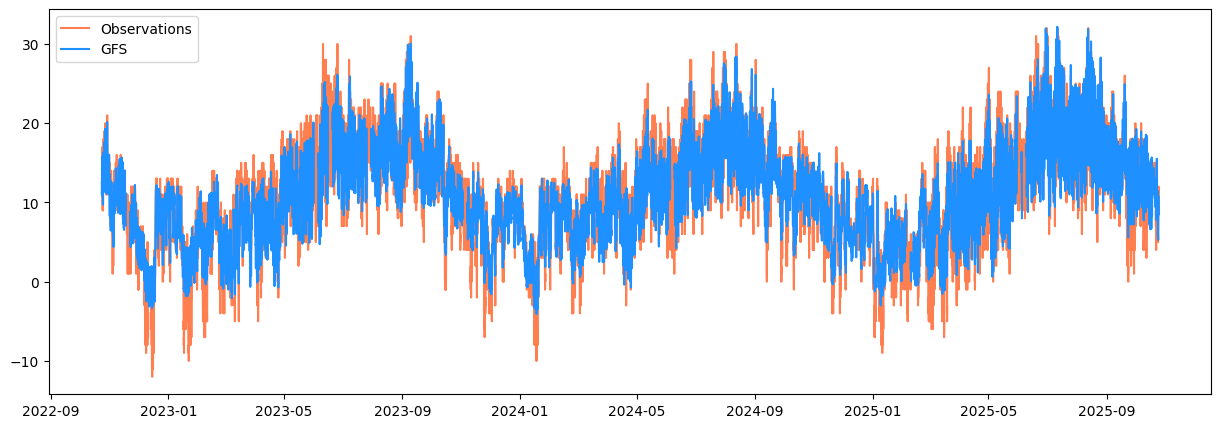

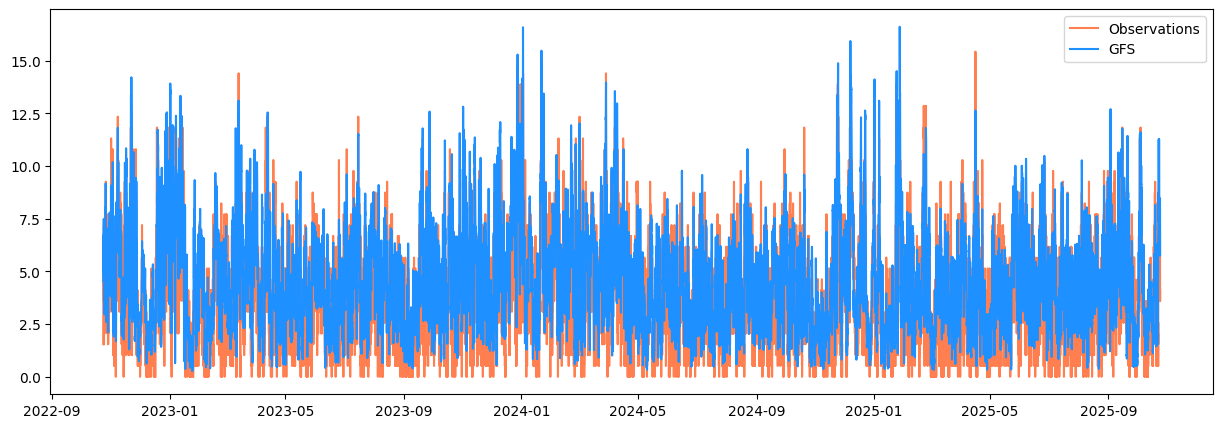

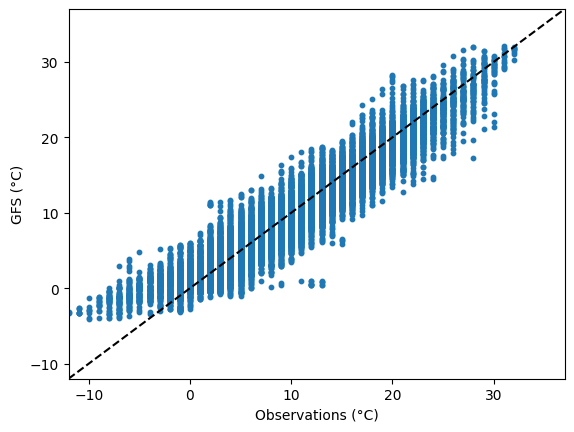

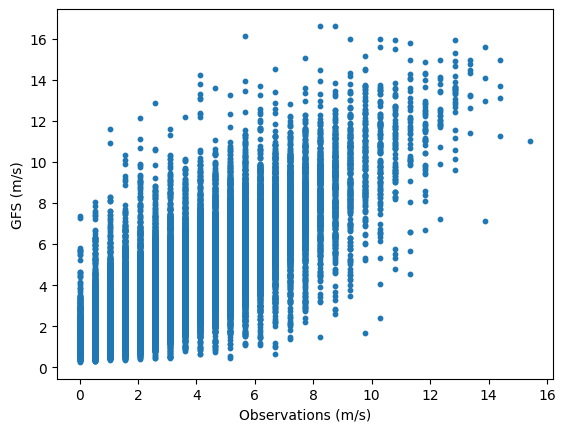

In [15]:
# 2m Air Temperature:
plt.figure(figsize=(15,5))
plt.plot(gfs_obs_df.select("valid_time"), gfs_obs_df.select("t2m"), label="Observations", color="coral")
plt.plot(gfs_obs_df.select("valid_time"), gfs_obs_df.select("t2m_gfs"), label="GFS", color="dodgerblue")
plt.legend()

# 10m Wind Speed:
plt.figure(figsize=(15,5))
plt.plot(gfs_obs_df.select("valid_time"), gfs_obs_df.select("ws10m"), label="Observations", color="coral")
plt.plot(gfs_obs_df.select("valid_time"), gfs_obs_df.select("ws10m_gfs"), label="GFS", color="dodgerblue")
plt.legend()

# Scatter Plots - 2m Air Temperature:
plt.figure()
plt.scatter(gfs_obs_df.select("t2m"), gfs_obs_df.select("t2m_gfs"), s=10)
plt.plot([-12, 37], [-12, 37], color="black", linestyle="--")
plt.xlim([-12, 37])
plt.ylim([-12, 37])
plt.xlabel("Observations (¬∞C)")
plt.ylabel("GFS (¬∞C)")

# Scatter Plots - 10m Wind Speed:
plt.figure()
plt.scatter(gfs_obs_df.select("ws10m"), gfs_obs_df.select("ws10m_gfs"), s=10)
# plt.plot([-12, 37], [-12, 37], color="black", linestyle="--")
# plt.xlim([-12, 37])
# plt.ylim([-12, 37])
plt.xlabel("Observations (m/s)")
plt.ylabel("GFS (m/s)")

## Export Training DataFrame

In [17]:
gfs_obs_df.write_parquet("/Users/Shared/scratch/ml_weather_forecasting/gfs_obs_training_2022_2025.parquet")